## Project 6 : Clustering
- Name: david beck
- Date: 11/16/21

## Instructions

### Description

Practice clustering on a using the well known and very popular `Iris` Dataset! The Iris flower data set is fun for learning supervised classification algorithms, and is known as a difficult case for unsupervised learning. 
https://cran.r-project.org/web/packages/dendextend/vignettes/Cluster_Analysis.html
<br><br>Yes, there are many examples out there, but see if you can do it yourself :). We can easily hypothesize on how many clusters would yield the best result, so let us prove it through a simple experiment that you could repeat with additional data sets.

### Grading

For grading purposes, we will clear all outputs from all your cells and then run them all from the top.  Please test your notebook in the same fashion before turning it in.

### Submitting Your Solution

To submit your notebook, first clear all the cells (this won't matter too much this time, but for larger data sets in the future, it will make the file smaller).  Then use the File->Download As->Notebook to obtain the notebook file.  Finally, submit the notebook file on Canvas.

### Setup

In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets
import sklearn as sk
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_samples, silhouette_score

### Problem 1: Data Generation (5 points)
Reference for more information: Chapter 5.11 K-Means in the online course book.

1. Load the `iris` dataset and separate into `X` and `y` variables (our ground truth labels will just be used for visualization).
2. Write a hypothesis on how many clusters will yield the best labeling.

In [57]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

**Hypothesis**(Edit this cell)
>
>i predict r is goinf to be the best cluster splitup because the is three different types so there should be three groups

### Problem 2: Data exploration (10 points)

This is the step where you would normally conduct any needed preprocessing, data wrangling, and investigation of the data.
<br>**Note:** `print(iris.DESCR)` prints the iris dataset description, provided you loaded it into a variable named `iris`

a. Using your skills from previous projects, provide code below to produce answers to the following questions (edit this cell with your answers): 

    1. How many features are provided?

    2. How many total observations?

    3. How many different labels are included, what are they called, and is it a balanced dataset with the same number of observations for each class?
        
b. Create a 2D or 3D scatter plot of two or three of the features and use the y labels for color coding. Do not reduce the data or number of features in any way (you will do this by applying PCA in problem 5).

c. Since clusters can be influenced by the magnitudes of the variables, normalize the feature data and plot a histogram of the normalized features data.

In [58]:
# a
print(iris.DESCR)
#4 features
#150 total observations
#3total iris-setosa   - iris Versicolour - iris Virginica
#it is a balanceed set bc there is an equal amount of points for each type

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

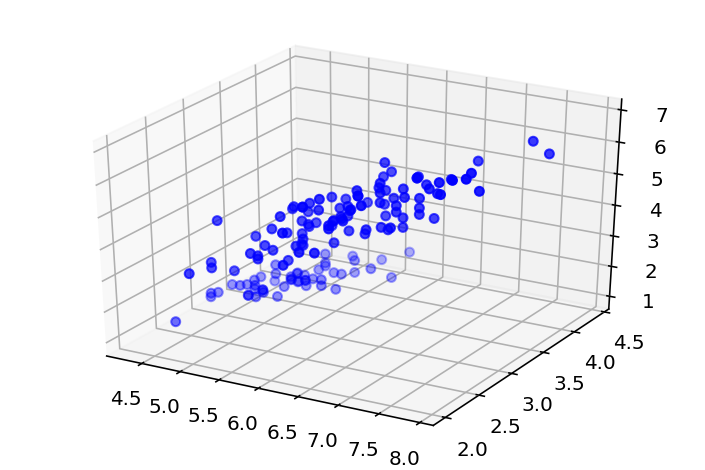

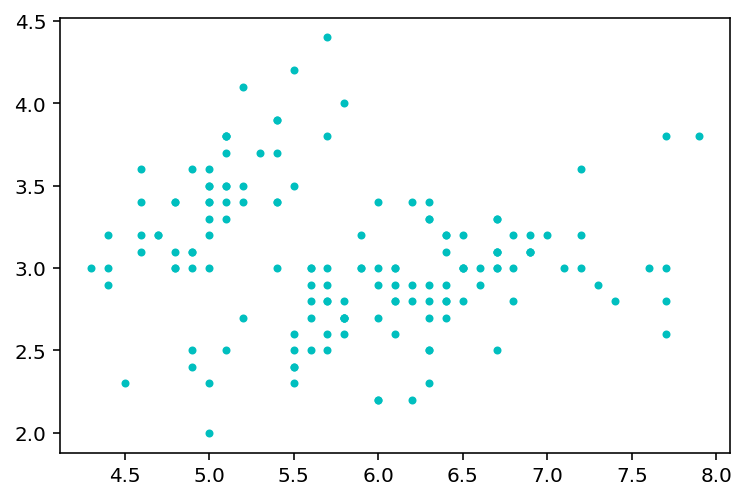

In [59]:
# b
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1],X[:,2], c = "b" , marker = "o")
plt.show()
plt.plot(X[:,0],X[:,1], 'c.')

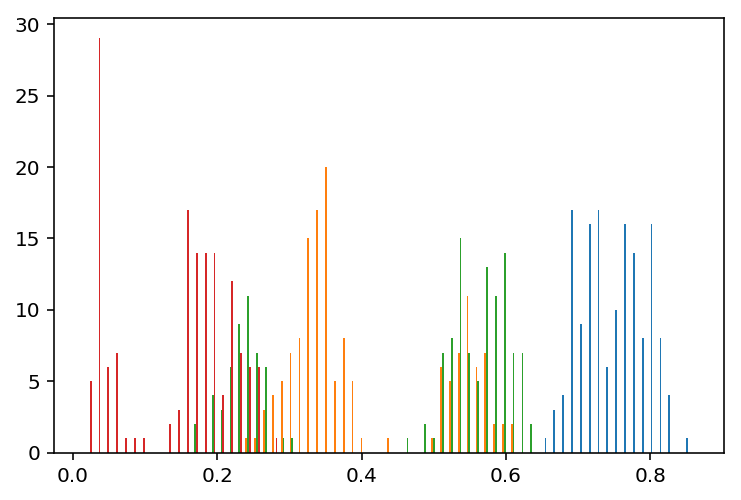

In [60]:
#c. Normalization
normalized = Normalizer()
normalized.fit(X)
X_norm = normalized.transform(X)
X_norm.shape

plt.hist(X_norm, bins = 69)
plt.show()

### Problem 3: Unsupervised Learning - Clustering (15 points)
Conduct clustering experiments with one of algorithms discussed in class (e.g., k-means) for number of clusters k = 2-10. Create another 2D or 3D scatter plot utilizing the <b>cluster assignments</b> for color coding (this output can be a plot for each of the values of k or just one final plot using the value of k from your best Silhouette result obtained in Problem 4 below).  

#### Steps:
Repeat for each value of k (maybe a loop here would be appropriate):
1. Create model object
2. Train or fit the model
3. Predict cluster assignments
4. Calculate Silhouette width (see Problem 4)
4. Plot points color coded by class labels predicted by the model.

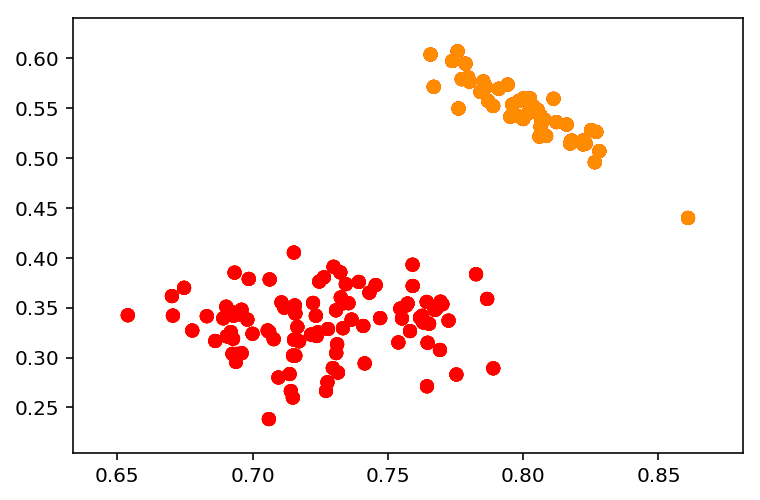

In [61]:
colorMap = ListedColormap(['r','y','b','k','g','c','m','black','darkorange'])
silhouetteList = []
for i in range(2,11):
    km = KMeans(2)
    km.fit(X_norm)
    predict = km.predict(X_norm)
    
    silhouetteAvg = silhouette_score(X_norm, predict)
    sample_silhoette_values = silhouette_samples(X_norm, predict)
    silhouetteList.append(silhouetteAvg)
    
    plt.scatter(X_norm[:,0], X_norm[:,1], c = predict, cmap = colorMap)


### Problem 4: Evaluate results (20 points)

As we have discussed, validating an usupervised problem is difficult. There is a metric that can be used to determine the density or separation of cluster assignments, called Silhouette width. In this step, perform analysis of results using the above `k = 2-10` and compute the Silhouette width (Hint: possibly you can just add code to your loop in problem 3 and store the results in a list of values). 

Scikit Learn has a great example for Silhouette analysis [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

1. For each k (k = 2-10), what are the Silhouette width values?
 

2. Discuss if your best number of clusters (highest Silhouette width value) matches your hypothesis from Problem 1.

In [62]:
print(silhouetteList)
for i in range(2,11):
    print("K value: ", i, "The average silhouette score is: ", silhouetteList[i-2])

[0.8192435078999415, 0.8192435078999415, 0.8192435078999415, 0.8192435078999415, 0.8192435078999415, 0.8192435078999415, 0.8192435078999415, 0.8192435078999415, 0.8192435078999415]
K value:  2 The average silhouette score is:  0.8192435078999415
K value:  3 The average silhouette score is:  0.8192435078999415
K value:  4 The average silhouette score is:  0.8192435078999415
K value:  5 The average silhouette score is:  0.8192435078999415
K value:  6 The average silhouette score is:  0.8192435078999415
K value:  7 The average silhouette score is:  0.8192435078999415
K value:  8 The average silhouette score is:  0.8192435078999415
K value:  9 The average silhouette score is:  0.8192435078999415
K value:  10 The average silhouette score is:  0.8192435078999415


In [63]:
#the ebst num of clisters is 2 which isnt the same as the number
# that was guessed in the hypothesis 
# IF you look at the data it seems to be seoerated into 2 groups 
#but 3 could happen if we use diff datapoints instead of the two columns

### Problem 5 (15 points): Principal Component Analysis (PCA)
PCA is the most popular form of dimensionality reduction, which basically, rotates and transforms the data into a new subspace, such that the resultant matrix has:
- Most relevance (variation) now associated with first feature
- Second feature gets the next most, etc.
#### Steps:
1. Reduce the feature data (X) using PCA
2. Repeat the same experiment from problem 3 above (remember your plots are now the 1st, 2nd, and possibly 3rd principal component vs. the raw feature data like before).
3. Compare and contrast results to those from previous/non-PCA problems; does it perform better/worse/same? Provide discussion below (this could vary, depending on setup).

K value:  2 The average silhouette score is:  0.8338554594825396


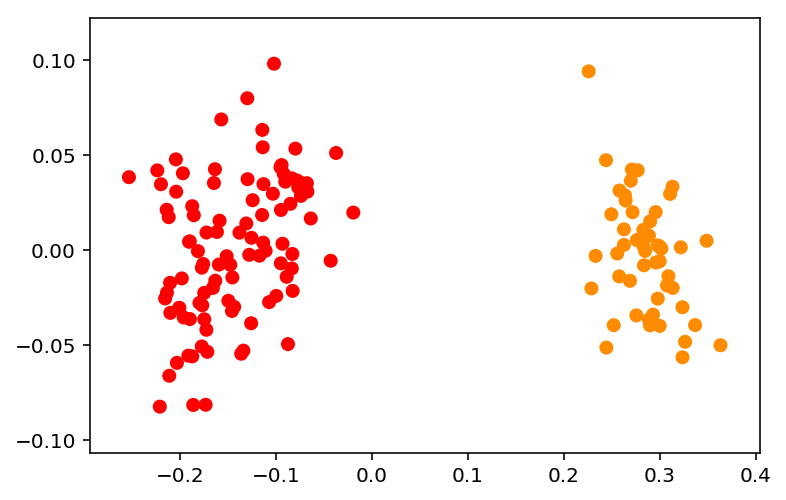

K value:  3 The average silhouette score is:  0.8338554594825396


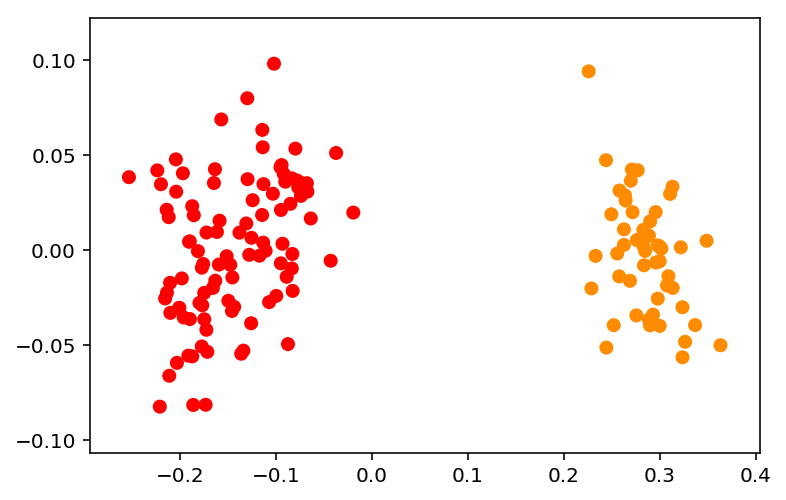

K value:  4 The average silhouette score is:  0.8338554594825396


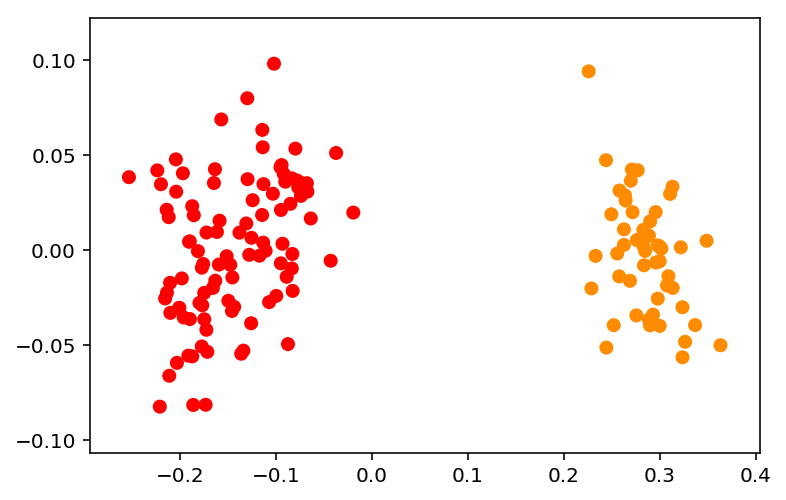

K value:  5 The average silhouette score is:  0.8338554594825396


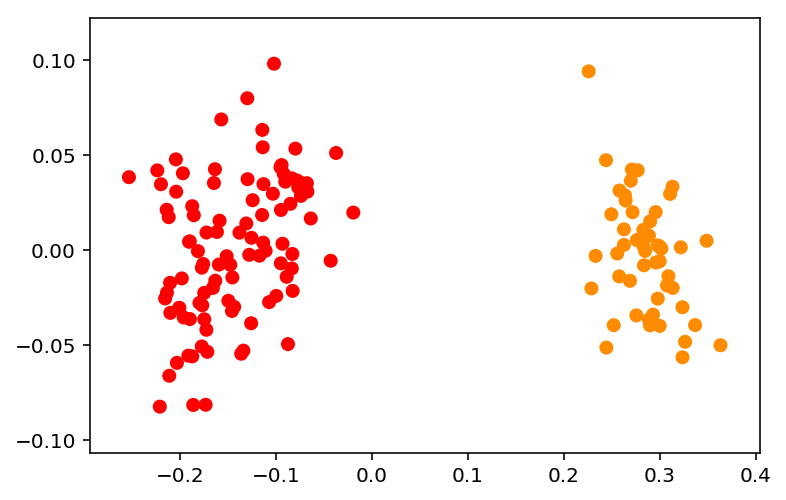

K value:  6 The average silhouette score is:  0.8338554594825396


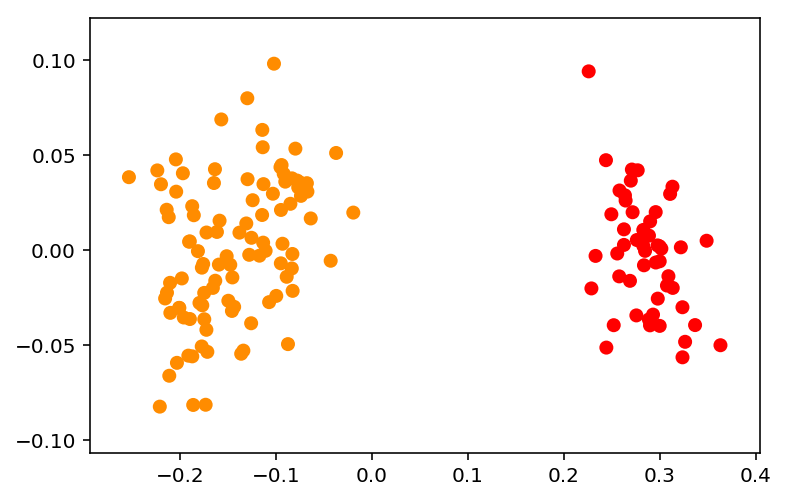

K value:  7 The average silhouette score is:  0.8338554594825396


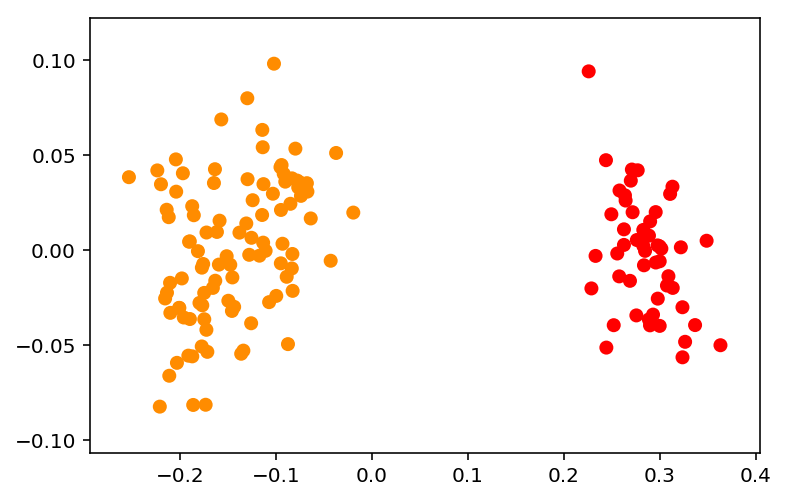

K value:  8 The average silhouette score is:  0.8338554594825396


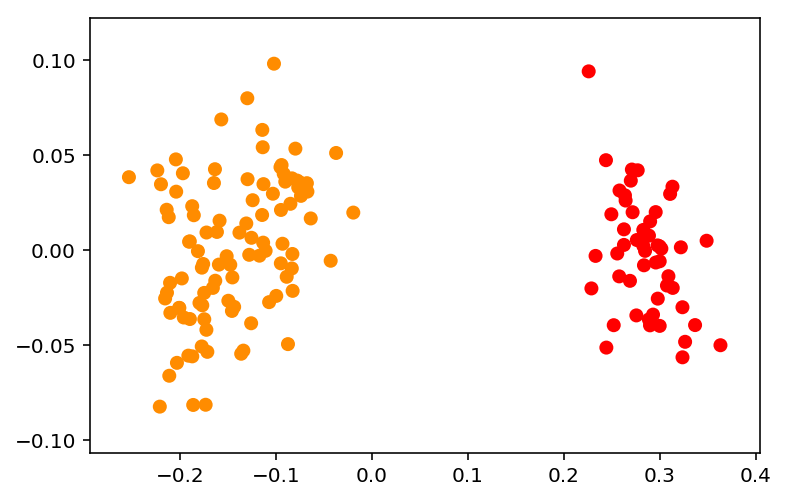

K value:  9 The average silhouette score is:  0.8338554594825396


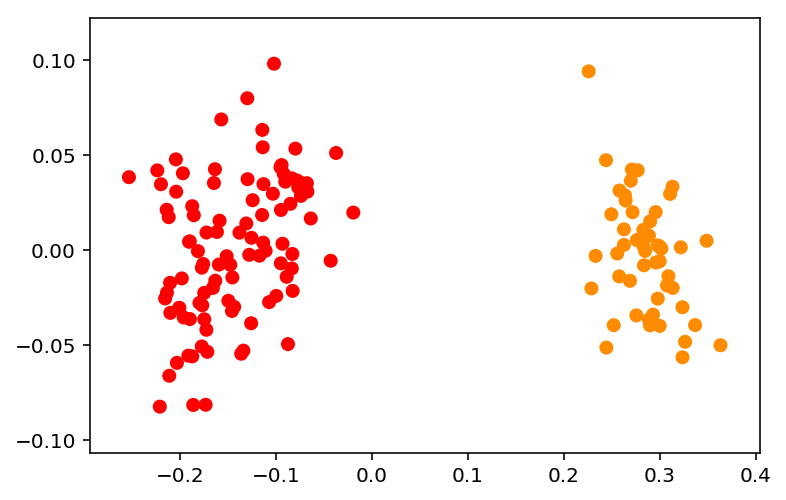

K value:  10 The average silhouette score is:  0.8338554594825396


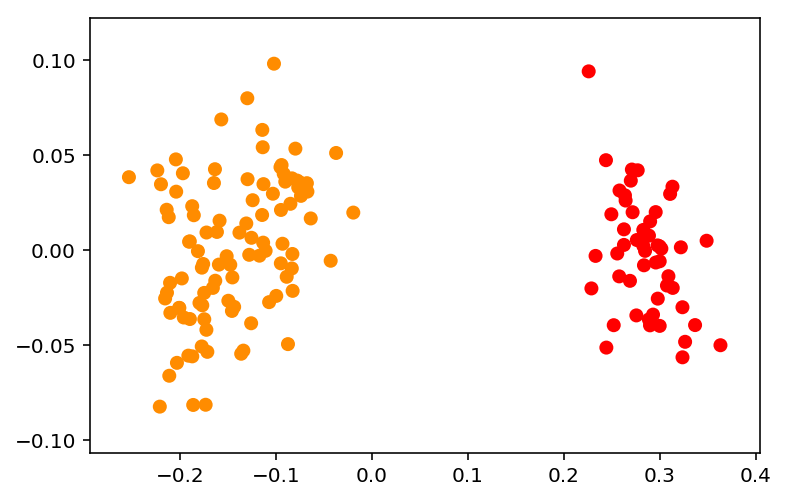

In [64]:
# Clustering with PCA
pca = PCA(n_components = 2)
data1_pca = pca.fit_transform(X_norm)


for i in range(2,11):
    km = KMeans(2)
    km.fit(data1_pca)
    predict = km.predict(data1_pca)
    silhouetteAvg = silhouette_score(data1_pca, predict)
    
    print("K value: " ,i, "The average silhouette score is: ", silhouetteAvg)
    plt.scatter(data1_pca[:,0], data1_pca[:,1],  c = predict, cmap = colorMap)
    plt.show()

In [65]:
# it worked better with pca transformation. as it
#seemed like the. silhoette score. is around 5 higher than the non pca cluster

**Discuss new results**(Edit this cell)
>
>

## You Finished! Treat yourself by taking this questionnaire
### Questionnaire
1) How long did you spend on this assignment?
<br><br> 3 hrs
2) What did you like about it? What did you not like about it?
<br><br> i enjoyed the applipical nature of the assignment
3) Did you find any errors or is there anything you would like changed?
<br><br> no 